In [3]:
from bloqade import var, save, load
from bloqade.atom_arrangement import Chain, Square, AtomArrangement
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import numpy as np
import os
output_notebook()

Loading BokehJS ...

In [130]:
if not os.path.isdir("data"):
    os.mkdir("data")

n_atoms = 9
lattice_spacing = 6.1
run_time = var("run_time")
omega_mult = 1

In [131]:
delta_end = 70
omega_max = 15.8
sweep_time = 1.6 #time length of program 
lattice_spacing = 7.0 #size of edges of square lattice
L=3 # number of unit cells in each direction

C6 = 2 * np.pi * 862690;
Rb = (C6 / (omega_max) )** (1/6) # R_B during bulk of protocol
print("Rb/a: ",Rb/lattice_spacing)


print("Delta/Omega: ", delta_end/omega_max)

Rb/a:  1.1952668759300964
Delta/Omega:  4.430379746835443


In [132]:
rabi_amplitude_values = [0.0, omega_max, omega_max, 0.0]
rabi_detuning_values = [-delta_end, -delta_end, delta_end, delta_end]
durations = [0.3, sweep_time, 0.3]

In [133]:
from math import pi
from bloqade import start


quantum_scar_program = (
    #[(0, 1), (np.sin(40), np.cos(40)), (np.sin(80), np.cos(80)), (np.sin(120), np.cos(120)), (np.sin(160), np.cos(160)), (-np.sin(40), np.cos(40)), (-np.sin(80), np.cos(80)), (-np.sin(120), np.cos(120)), (-np.sin(160), np.cos(160))]
    #[(0, 1), (np.sin(2/10*pi), np.cos(2/10*pi)), (np.sin(4/10*pi), np.cos(4/10*pi)), (np.sin(6/10*pi), np.cos(6/10*pi)), (np.sin(8/10*pi), np.cos(8/10*pi)), (np.sin(10/10*pi), np.cos(10/10*pi)), (np.sin(12/10*pi), np.cos(12/10*pi)), (np.sin(14/10*pi), np.cos(14/10*pi)), (np.sin(16/10*pi), np.cos(16/10*pi)), (np.sin(18/10*pi), np.cos(18/10*pi))]
    start.add_position([(0, 1), (np.sin(2/9*pi), np.cos(2/9*pi)), (np.sin(4/9*pi), np.cos(4/9*pi)), (np.sin(6/9*pi), np.cos(6/9*pi)), (np.sin(8/9*pi), np.cos(8/9*pi)), (np.sin(10/9*pi), np.cos(10/9*pi)), (np.sin(12/9*pi), np.cos(12/9*pi)), (np.sin(14/9*pi), np.cos(14/9*pi)), (np.sin(16/9*pi), np.cos(16/9*pi))]).scale(8)

    # define detuning waveform
    .rydberg.detuning.uniform.piecewise_linear(durations, rabi_detuning_values)
    .piecewise_linear([0.2, 1.6], [16.3, 0.0, 0.0])
    .slice(start=0, stop=run_time)

    # define rabi waveform
    .rydberg.rabi.amplitude.uniform.piecewise_linear(durations, rabi_amplitude_values)
    .piecewise_linear([0.2, 1.4, 0.2], [0, 15.7, 15.7, 0])
    .slice(start=0, stop=run_time - 0.065)

    .record("rabi_value")
    .linear("rabi_value", 0, 0.065)
)

In [134]:
quantum_scar_program.parse_register().show()

In [135]:
# get run times via the following:
prep_times = np.arange(0.2, 2.2, 0.2)
scar_times = np.arange(2.2, 4.01, 0.1)
run_times = np.unique(np.hstack((prep_times, scar_times)))

batch = quantum_scar_program.batch_assign(run_time=run_times - 0.1)

In [136]:
run_times

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.3, 2.4,
       2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7,
       3.8, 3.9, 4. ])

In [137]:
emu_filename = os.path.join(
    os.path.abspath(""), "data", "quantum-scar-dynamics-emulation.json"
)


emu_batch = batch.bloqade.python().run(50, interaction_picture=True)
save(emu_batch, emu_filename)


filename = os.path.join(os.path.abspath(""), "data", "quantum-scar-dynamics-job.json")

In [143]:
emu_batch = load(emu_filename)
hardware_batch = load(filename)

In [139]:
# hardware_batch.fetch()
# save(hardware_batch, filename)

#create variable that auto updates bitstring 
prep_state_list = [0 if i % (1 + 1) < 1 else 1 for i in range(n_atoms)]

prep_state_string = ''
for i in prep_state_list: 
    prep_state_string += str(i)

print(prep_state_string)
    

def get_z2_probabilities(report):
    z2_probabilities = []

    for count in report.counts():
        z2_probability = count.get(prep_state_string, 0) / sum(list(count.values()))
        z2_probabilities.append(z2_probability)

    return z2_probabilities

010101010


In [140]:
emu_z2_prob

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04,
 0.22,
 0.26,
 0.28,
 0.2,
 0.08,
 0.08,
 0.02,
 0.04,
 0.02,
 0.06,
 0.14,
 0.0,
 0.14,
 0.14,
 0.0,
 0.04,
 0.12,
 0.12,
 0.14,
 0.02,
 0.1]

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ywang_sy2849a\AppData\Local\Temp\ipykernel_54820\77304170.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Time ($\mu s$)")


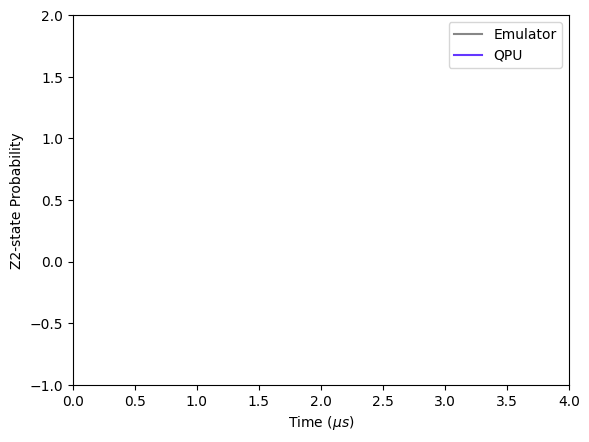

<Figure size 640x480 with 0 Axes>

In [144]:
emu_report = emu_batch.report()
hardware_report = hardware_batch.report()

emu_run_times = emu_report.list_param("run_time")
emu_z2_prob = get_z2_probabilities(emu_report)

hw_run_times = hardware_report.list_param("run_time")
hw_z2_prob = get_z2_probabilities(hardware_report)


plt.plot(emu_run_times, emu_z2_prob, label="Emulator", color="#878787")
plt.plot(hw_run_times, hw_z2_prob, label="QPU", color="#6437FF")

plt.xlim(0, 4.0)
plt.ylim(-1, 2)

plt.legend()
plt.xlabel("Time ($\mu s$)")
plt.ylabel("Z2-state Probability")
plt.show()
plt.savefig("CYCLE test 1")

In [128]:
emu_report.rydberg_densities()

,0,1,2,3,4,5,6,7,8,9,10
task_number,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00
3,0.00,0.00,0.02,0.02,0.06,0.02,0.04,0.00,0.02,0.00,0.04
4,0.06,0.02,0.10,0.02,0.12,0.06,0.04,0.06,0.02,0.08,0.02
5,0.10,0.10,0.16,0.12,0.10,0.10,0.12,0.14,0.08,0.10,0.20
6,0.14,0.36,0.24,0.30,0.18,0.34,0.14,0.30,0.30,0.04,0.74
7,0.18,0.62,0.28,0.46,0.36,0.36,0.42,0.30,0.54,0.00,0.92
8,0.34,0.60,0.34,0.56,0.38,0.46,0.46,0.44,0.54,0.00,0.98
